### Boston House Pricing ML Model

### About the Data
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston). The dataset has 506 cases.
Variables: There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - per lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

### Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# Loading the data 
boston= pd.read_csv(r"C:\Users\srish\Downloads\Projects\House Pricing model\boston_house_price.csv")
print('Shape of Data is : {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Shape of Data is : 506 rows and 14 columns


# Preparing the data

In [11]:
#setting the first row as header
boston.columns = df.iloc[0]
boston = df[1:]
                

In [12]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [13]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 1 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [14]:
#summarising the data
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
#Checking missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis

In [16]:
## Correlation
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200283,0.406251,-0.056132,0.420934,-0.218978,0.352701,-0.379627,0.625396,0.582568,0.289394,-0.384839,0.455329,-0.388249
ZN,-0.200283,1.000000,-0.534022,-0.042550,-0.516574,0.311835,-0.569524,0.664395,-0.311717,-0.314351,-0.391713,0.175319,-0.412894,0.360393
INDUS,0.406251,-0.534022,1.000000,0.062350,0.764556,-0.391330,0.645543,-0.708848,0.594167,0.720561,0.380955,-0.356506,0.602737,-0.484126
CHAS,-0.056132,-0.042550,0.062350,1.000000,0.091134,0.091497,0.086461,-0.099109,-0.007907,-0.035965,-0.122570,0.049040,-0.054576,0.175364
NOX,0.420934,-0.516574,0.764556,0.091134,1.000000,-0.302127,0.731461,-0.769221,0.611758,0.668141,0.188918,-0.380006,0.591262,-0.427295
RM,-0.218978,0.311835,-0.391330,0.091497,-0.302127,1.000000,-0.240211,0.205170,-0.209277,-0.291680,-0.355116,0.127754,-0.613734,0.695365
AGE,0.352701,-0.569524,0.645543,0.086461,0.731461,-0.240211,1.000000,-0.747872,0.456232,0.506527,0.261724,-0.273486,0.602782,-0.376932
DIS,-0.379627,0.664395,-0.708848,-0.099109,-0.769221,0.205170,-0.747872,1.000000,-0.494798,-0.534492,-0.232561,0.291451,-0.497277,0.249896
RAD,0.625396,-0.311717,0.594167,-0.007907,0.611758,-0.209277,0.456232,-0.494798,1.000000,0.910202,0.463322,-0.444065,0.487608,-0.381690
TAX,0.582568,-0.314351,0.720561,-0.035965,0.668141,-0.291680,0.506527,-0.534492,0.910202,1.000000,0.460100,-0.441505,0.543435,-0.468543


In [17]:
#renaming Column
boston.rename(columns = {'MEDV' : 'PRICE'}, inplace = True)

C:\Users\srish\AppData\Local\Temp\ipykernel_15928\2848392308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston.rename(columns = {'MEDV' : 'PRICE'}, inplace = True)


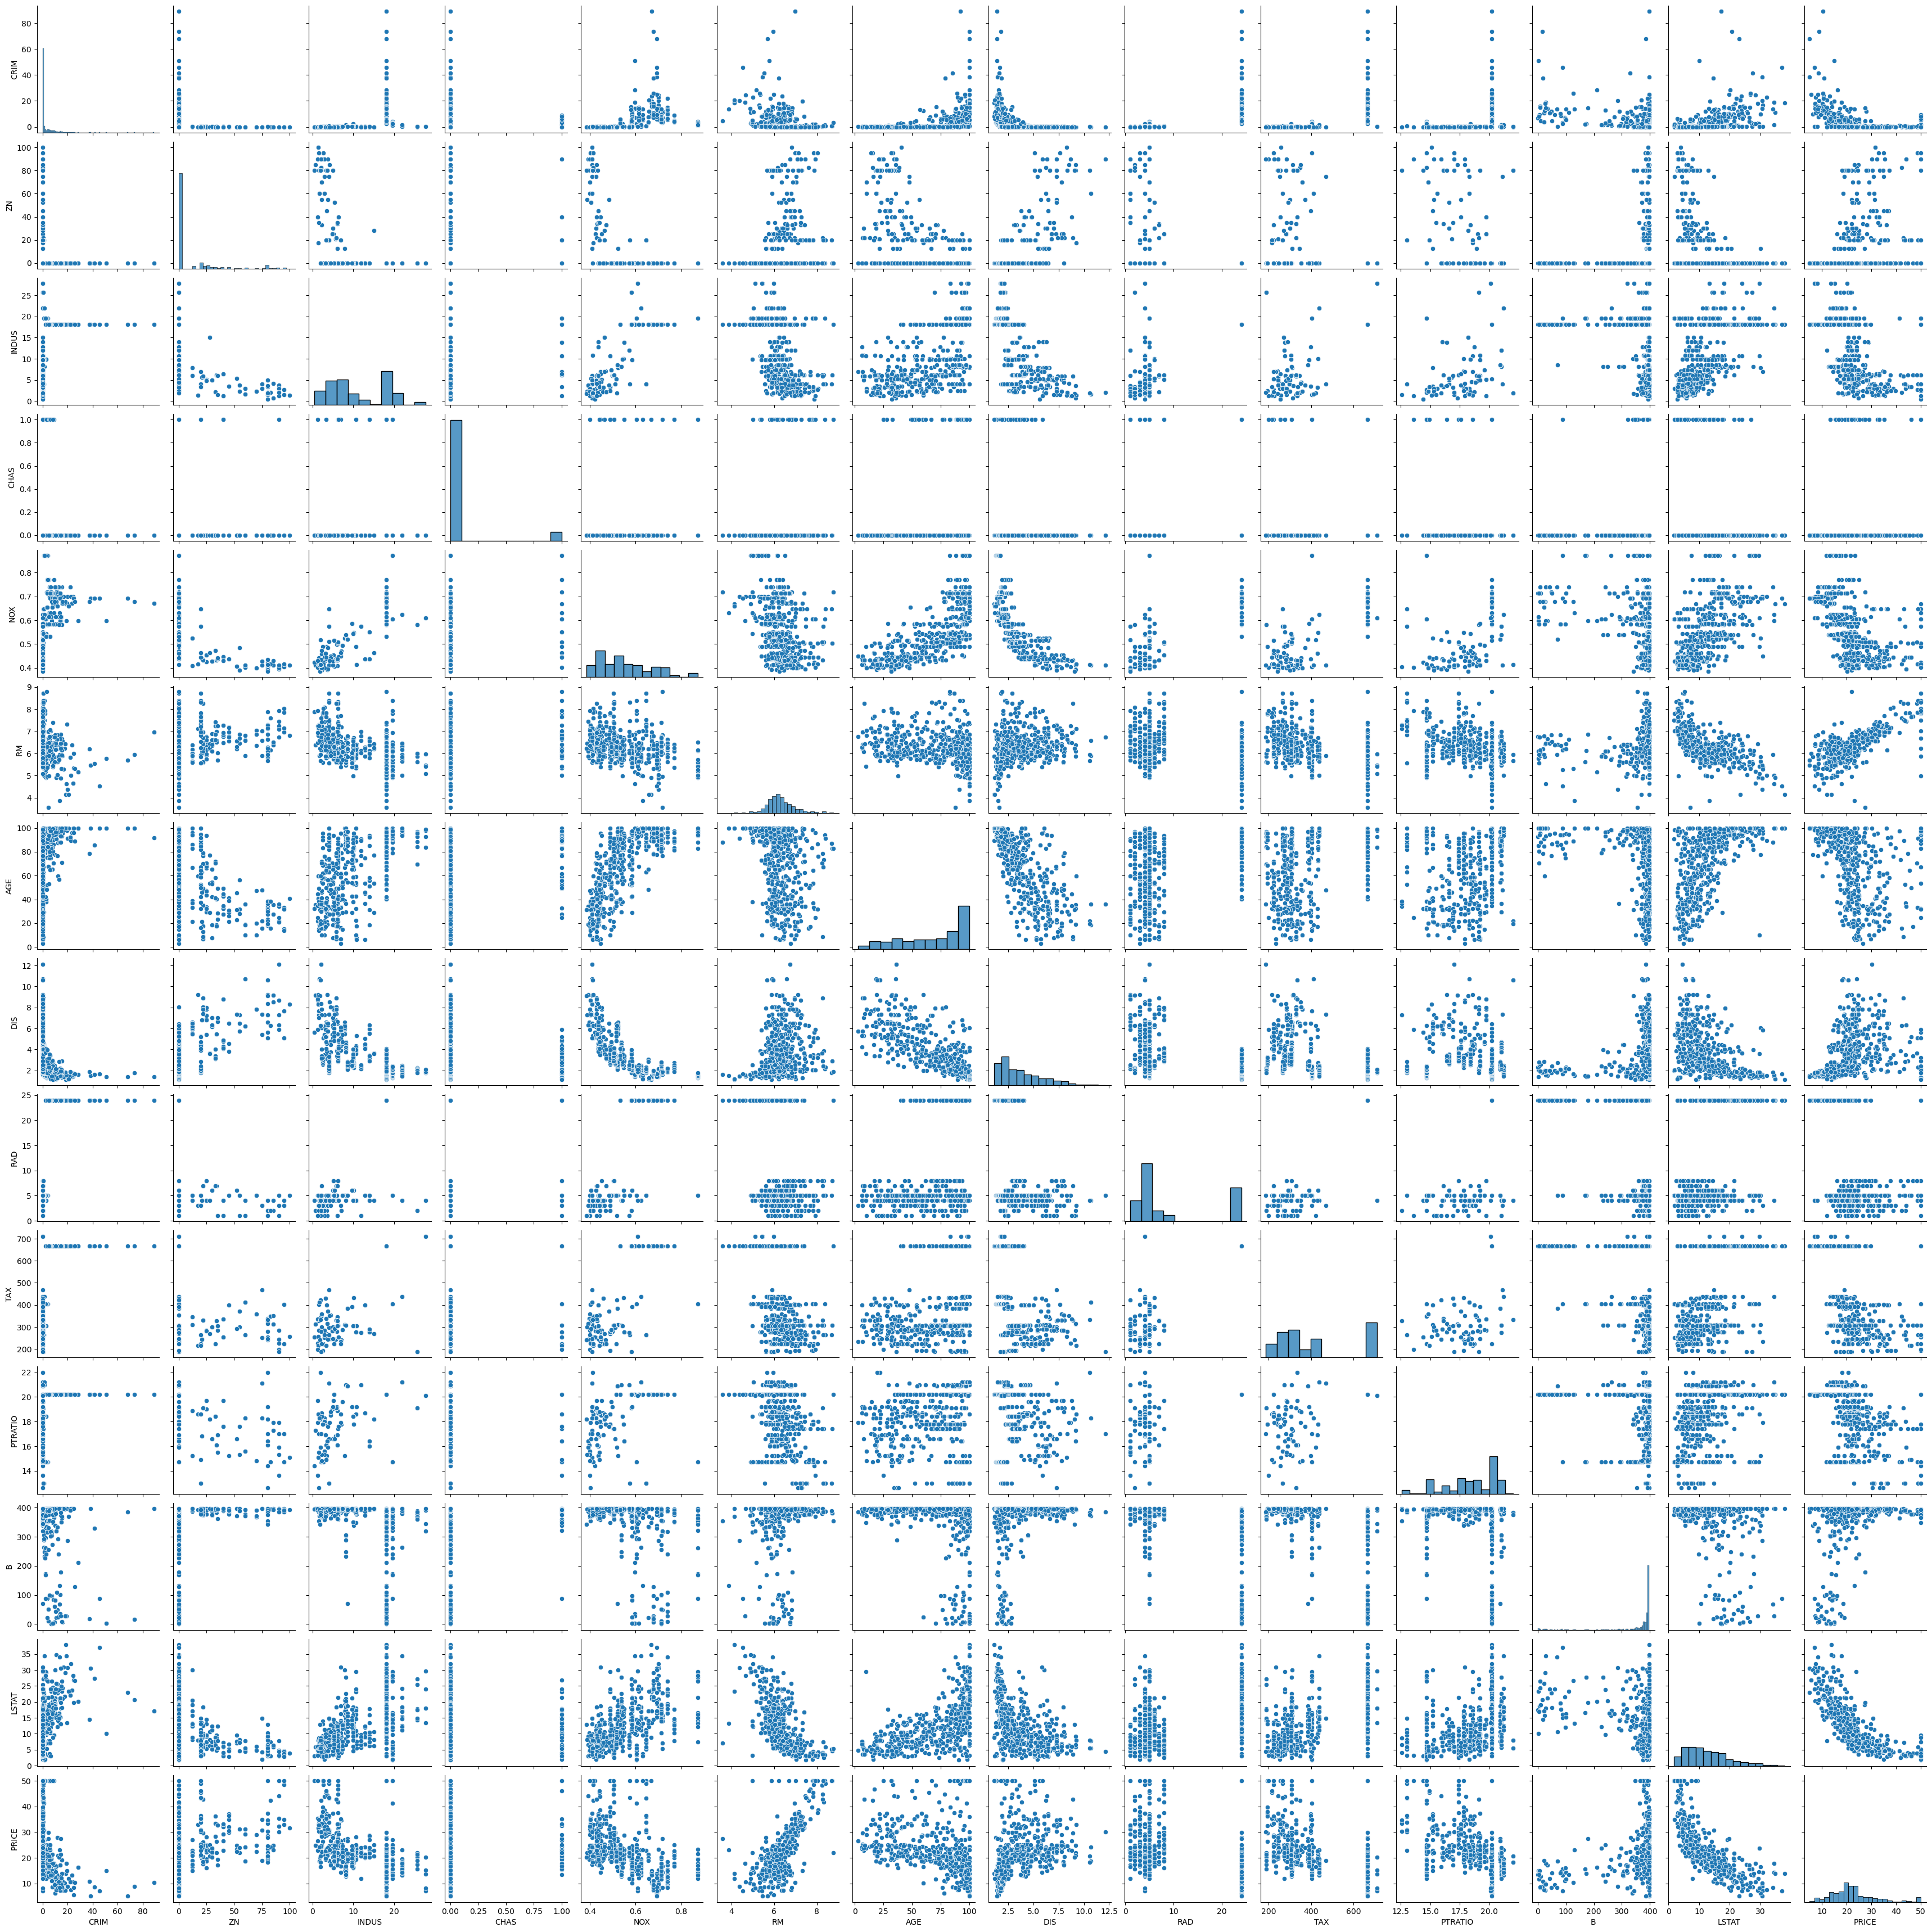

In [18]:
sns.pairplot(boston)

Except RM and MEDV, nothing else is normally distributed, this might be an issue, as most statistical assumptions hold true only when our data is normally distributed.

Text(0, 0.5, 'Price')

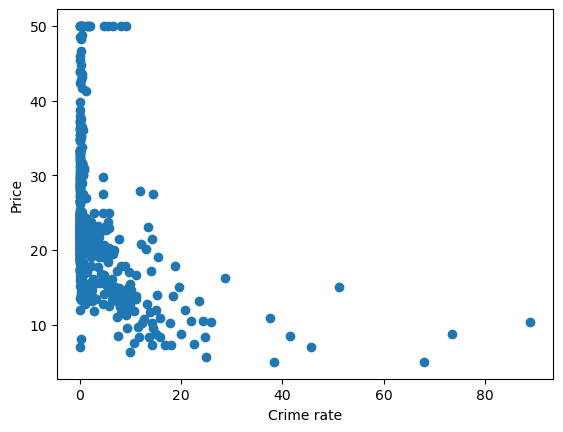

In [19]:
plt.scatter(boston['CRIM'],boston['PRICE'])
plt.xlabel("Crime rate")
plt.ylabel("Price")

## Inversely related

<Axes: xlabel='RM', ylabel='PRICE'>

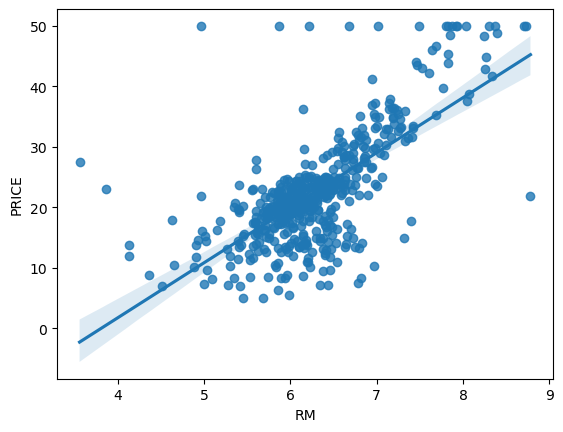

In [20]:
import seaborn as sns
sns.regplot(x = "RM", y ='PRICE', data = boston)

<Axes: xlabel='LSTAT', ylabel='PRICE'>

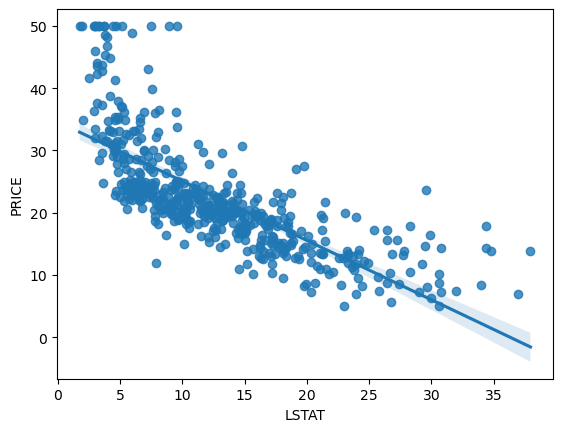

In [21]:
sns.regplot(x = "LSTAT", y ='PRICE', data = boston)

<Axes: xlabel='CHAS', ylabel='PRICE'>

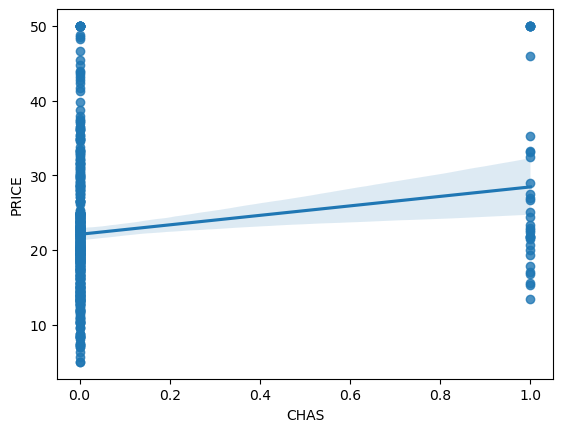

In [22]:
sns.regplot(x = "CHAS", y ='PRICE', data = boston)

<Axes: xlabel='PTRATIO', ylabel='PRICE'>

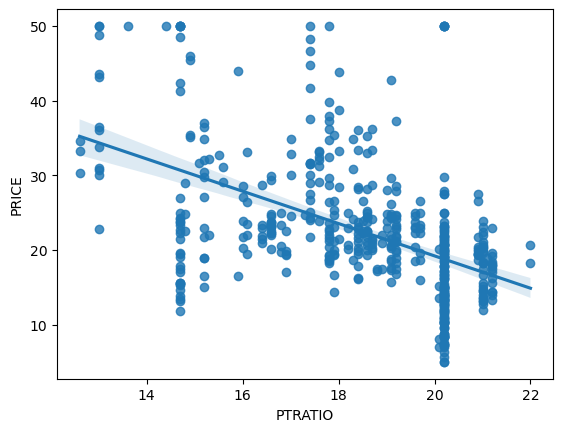

In [23]:
sns.regplot(x = "PTRATIO", y ='PRICE', data = boston)

In [24]:
# Independent and Dependent features

X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]

In [25]:
# Train test split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

In [26]:
# Standardising the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
reg = LinearRegression()

In [161]:
reg.fit(X_train,y_train)

LinearRegression()

In [164]:
# Finding out the methods on which this model is trained

reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [165]:
# Prediction with test data

y_pred = reg.predict(X_test)

In [166]:
reg_pred

array([26.69233685, 33.66729256, 14.98977881, 23.60306119, 35.44214254,
       23.52662362, 11.70133095,  3.32433043, 24.03984452, 20.67677689,
       30.23320037, 19.6149075 , 28.29686276, 22.57039359, 19.50968001,
       26.05314899, 22.30997057,  8.07702429, 36.50781698, 18.41077971,
       28.31619454, 35.24903791, 18.29533297, 23.45209762, 18.73196546,
       11.25083415, 28.23055232, 21.35939411, 16.53459805, 19.21564253,
       29.5685158 , 14.75690256, 26.44650062, 20.15455205, 16.22718653,
       22.97746978, 28.94504553, 19.79546307, 16.69486468, 25.38197036,
       13.74014702, 19.41818531, 22.17212865, 20.76167788, 27.68272308,
       31.14745414, 13.03489031, 21.2946087 , 20.98840927, 25.50654878,
       20.81678186, 40.64802356, 13.73328088, 18.91111096, 25.007344  ,
       22.99811645, 19.71172425, 33.55646368, 27.94297703, 20.00903292,
       23.82297418, 24.68425875, 24.56980092, 18.27199726, 16.3135099 ,
       22.34035303, 21.20230251, 24.83847861, 33.45470735, 11.97

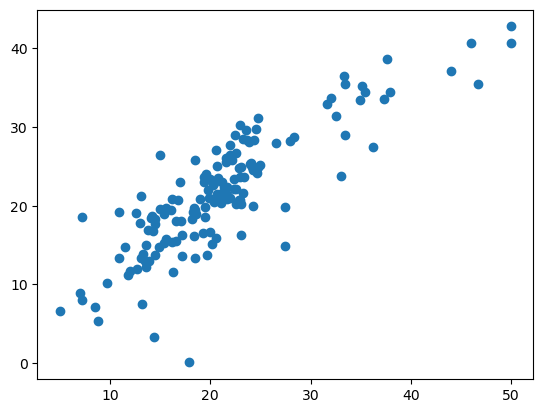

In [167]:
# Plot a  scatter plot for predictions
plt.scatter( y_test,y_pred)

In [168]:
## predictions with residuals
residuals = y_test - y_pred
residuals

174   -4.092337
275   -1.667293
491   -1.389779
73    -0.203061
306   -2.042143
         ...   
441   -0.986389
24    -0.150725
226   -1.036240
433   -2.526648
447   -6.455030
Name: PRICE, Length: 152, dtype: float64

<Axes: xlabel='PRICE', ylabel='Count'>

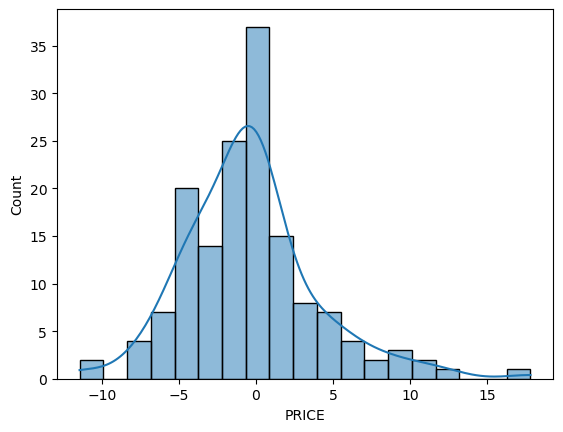

In [169]:
# plotting residuals

sns.histplot(residuals, kde= True)

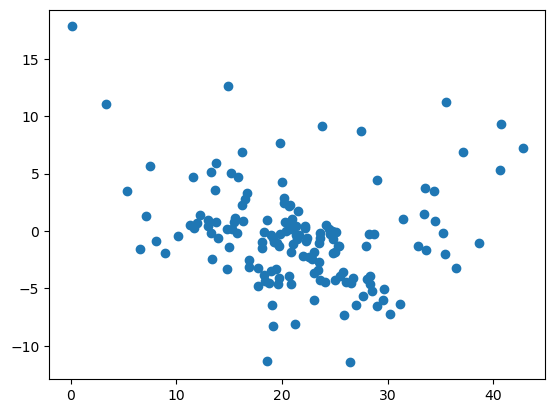

In [170]:
# Scatter plot in respect to predictions and residuals
plt.scatter(y_pred,residuals)

# Performance Metrics

In [171]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [172]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

18.885453623970353
3.1269475047856936
4.345739709643268


In [173]:
# R square and adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.709256665750732


In [174]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6818678009301488

# Prediction of new data

In [187]:
X.values[0].reshape(1,-1).shape

(1, 13)

In [189]:
reg.predict(scaler.transform(X.values[0].reshape(1,-1)))

C:\Users\srish\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25.50654878])